In [9]:
import numpy
import scipy.special #for sigmoid function expit()
import matplotlib.pyplot as plt #for f1 score plotting
from gensim.models import KeyedVectors
import csv
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import f1_score

### Neural Network Design

In [10]:
optimal = (203621/(2*(909)))
print(optimal)

112.00275027502751


In the previous portfolio we found that:
B-ORG: 6321
O: 169578
B-MISC: 3438
B-PER: 6600
I-PER: 4528
B-LOC: 7140
I-ORG: 3704
I-MISC: 1155
I-LOC: 1157

In [11]:
def calculate_class_weights(labels):
    n_samples = 203621
    n_classes = 9
    class_counts = {"O": 169578, "B-MISC": 3438, "B-PER": 6600, "I-PER": 4528, "B-LOC": 7140, "I-ORG": 3704,
						"I-MISC": 1155, "I-LOC": 1157}
    class_weights = {label: n_samples / (n_classes * class_counts[label]) for label in labels}
    return class_weights

In [35]:
print(class_weights)

{'O': 0.13341680852206983, 'B-MISC': 6.580731691551936, 'B-PER': 3.427962962962963, 'I-PER': 4.996589124460149, 'B-LOC': 3.1687052598817305, 'I-ORG': 6.108141348692104, 'I-MISC': 19.58835978835979, 'I-LOC': 19.554499183712668}


In [44]:
class neuralNetwork:
	def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate, class_weights):
		self.inodes = inputnodes
		self.hnodes = hiddennodes
		self.onodes = outputnodes

		self.lr = learningrate
		self.class_weights = class_weights

		self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
		self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
		## normal dist centred around 0.0
		## pow -> raising the number of nodes to the power of -0.5
		## last part: shape the array as we want
		self.activation_function = lambda x: scipy.special.expit(x)


	def train(self, inputs_list, targets_list):
		## phase 1: calculating output just as query does
		weighted_targets = []

		for target in targets_list:
			weight = self.class_weights.get(target, 1.0)  # Default to 1.0 if the class is not found
			weighted_targets.append(target * weight)  # Multiply the target by its weight

		weighted_targets = numpy.array(weighted_targets).T  # Transpose to match shape

		# Step 2: Calculate output just as before
		inputs = numpy.array(inputs_list, ndmin=2).T
		targets = weighted_targets

		hidden_inputs = numpy.dot(self.wih, inputs)
		hidden_outputs = self.activation_function(hidden_inputs)

		final_inputs = numpy.dot(self.who, hidden_outputs)
		final_outputs = self.activation_function(final_inputs)

		# Step 3: Backpropagation
		output_errors = targets - final_outputs
		hidden_errors = numpy.dot(self.who.T, output_errors)
		self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
		self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))


	## takes input to a nn and returns the output
	def query(self, inputs_list):
		## we want 2D array as wih is 2D matrix
		inputs = numpy.array(inputs_list, ndmin = 2).T
		hidden_inputs = numpy.dot(self.wih, inputs)
		hidden_outputs = self.activation_function(hidden_inputs)

		final_inputs = numpy.dot(self.who, hidden_outputs)
		final_outputs = self.activation_function(final_inputs)

		return final_outputs

In [45]:
input_nodes = 900 #as the word embedding returns 900 dimensions
hidden_nodes = 100
output_nodes = 9 # 9 output nodes in total

labels = ["O", "B-MISC", "B-PER", "I-PER", "B-LOC", "I-ORG", "I-MISC", "I-LOC"]
class_weights = calculate_class_weights(labels)

lr = 0.1
lr2 = 0.2
lr3 = 0.3
lr4 = 0.4
lr5 = 0.5
lr6 = 0.6
lr7 = 0.7
lr8 = 0.8
lr9 = 0.9

n00 = neuralNetwork(input_nodes, 15, output_nodes, lr ,class_weights)
n01 = neuralNetwork(input_nodes, 30, output_nodes, lr ,class_weights)
n02 = neuralNetwork(input_nodes, 50, output_nodes, lr ,class_weights)
n03 = neuralNetwork(input_nodes, 100, output_nodes, lr ,class_weights)
n04 = neuralNetwork(input_nodes, 200, output_nodes, lr ,class_weights)
n05 = neuralNetwork(input_nodes, 300, output_nodes, lr ,class_weights)
n06 = neuralNetwork(input_nodes, 500, output_nodes, lr ,class_weights)
n07 = neuralNetwork(input_nodes, 700, output_nodes, lr ,class_weights)
n08 = neuralNetwork(input_nodes, 900, output_nodes, lr ,class_weights)


n10 = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr ,class_weights)
n11 = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr2 ,class_weights)
n12 = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr3 ,class_weights)
n13 = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr4 ,class_weights)
n14 = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr5 ,class_weights)
n15 = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr6 ,class_weights)
n16 = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr7 ,class_weights)
n17 = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr8 ,class_weights)
n18 = neuralNetwork(input_nodes, hidden_nodes, output_nodes, lr9 ,class_weights)

epochs1 = 3
epochs2 = 6
epochs3 = 9
epochs4 = 12
epochs5 = 14
epochs6 = 16
epochs7 = 18
epochs8 = 21

label_to_index = {'O': 0, 'B-ORG': 1, 'I-ORG': 2, 'B-PER': 3, 'I-PER':4, 'B-MISC': 5, 'I-MISC':6, 'B-LOC':7, 'I-LOC':8}
index_to_label = {m: k for k, m in label_to_index.items()}

### Input: Word Embeddings

In [14]:
# Load Word2Vec embeddings
word_embedding_model = KeyedVectors.load_word2vec_format(
    '../ML/GoogleNews-vectors-negative300.bin', binary=True
)

In [15]:
new_train_file = "/Users/yuleumpark/Desktop/ML/data/new.conll2003.train.conll"
new_dev_file = "/Users/yuleumpark/Desktop/ML/data/new.conll2003.dev.conll"
new_test_file = "/Users/yuleumpark/Desktop/ML/data/new.conll2003.test.conll"

In [29]:
def extract_embedding_and_gold(conllfile, word_embedding_model):
	labels = []
	features = []
	
	conllinput = open(conllfile, 'r')
	csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
	for row in csvreader:
		if len(row) > 3:
			if row[0] in word_embedding_model:
				vector1 = word_embedding_model[row[0]]
			else:
				vector1 = [0]*300
			if row[1] in word_embedding_model:
				vector2 = word_embedding_model[row[1]]
			else:
				vector2 = [0]*300
			if row[2] in word_embedding_model:
				vector3 = word_embedding_model[row[2]]
			else:
				vector3 = [0]*300
			# After creating the feature vector
			vector = np.concatenate((vector2, vector1, vector3))
			features.append(vector)
			labels.append(row[-1])
	return features, labels

In [30]:
train_embed, train_label = extract_embedding_and_gold(new_train_file, word_embedding_model)
dev_embed, dev_label = extract_embedding_and_gold(new_dev_file, word_embedding_model)

In [18]:
### This is the code provided by Manya so that I can check if my issue is coming from the embedding generation process
import numpy as np

def extract_combined_features_and_labels_dense(conllfile, word_embedding_model):
    """
    This function extracts combined dense feature vectors for current, previous and following tokens, and then their respective
    gold labels.
    Parameters
    - conllfile: str: path to the file
    - word_embedding_model: pretrained word embedding model: gensim.models.keyedvectors.Word2VecKeyedVectors
    Returns
    - comb_features: list of arrays of only dense combined token and feature vector representations
    - return labels: list of gold labels
    """
    gold_labels = []  #list to store the gold labels for each token
    comb_features = []  #list to store the combined dense feature vectors

    #Opening the ConLL file and reading its entire contents line by line and skipping empty lines
    with open(conllfile, 'r', encoding='utf8') as infile:
        lines = infile.readlines()
    for i, line in enumerate(lines):
        components = line.rstrip('\n').split()
        if len(components) > 0:
            token = components[0]
            #Getting word embedding for each token, if not, assigning it a sparse vector of 300 dimensions
            if token in word_embedding_model:
                current_embed = word_embedding_model[token]
            else:
                current_embed = ([0] * 300) 
            #Adding gold labels from each token
            gold_labels.append(components[-1])
            #Getting the embeddings for the previous token, if not, assigning it a sparse vector of 300 dimensions
            if i > 0:
                prev_components = lines[i - 1].rstrip('\n').split()
                prev_token = prev_components[0] if len(prev_components) > 0 else None
                prev_embed = word_embedding_model[prev_token] if prev_token in word_embedding_model else ([0] * 300) 

            #Getting the embeddings for the following token, if not, assigning it a sparse vector of 300 dimensions
            if i + 1 < len(lines):
                follow_components = lines[i + 1].rstrip('\n').split()
                follow_token = follow_components[0] if len(follow_components) > 0 else None
                follow_embed = word_embedding_model[follow_token] if follow_token in word_embedding_model else ([0] * 300) 

            #Combining all the embeddings into one
            comb_feature_vector = np.concatenate((prev_embed, current_embed, follow_embed))
            comb_features.append(comb_feature_vector)

    return comb_features, gold_labels

In [20]:
train_features, train_labels = extract_embedding_and_gold(new_train_file, word_embedding_model)

In [21]:
dev_features, dev_labels = extract_embedding_and_gold(new_dev_file, word_embedding_model)

### Generate Predictions / Classification report

In [22]:
def train_model(model, epoch):
	for e in range(epoch):
		for i in range(len(train_features)):
			input = train_features[i]
			label = train_labels[i]
			targets = numpy.zeros(output_nodes) + 0.01
			targets[label_to_index[label]] = 0.99
			model.train(input, targets)

def make_pred(model,predictions):
	for i in range(len(dev_features)):
		input = dev_features[i]
		outputs = model.query(input)
		predicted_label_index = np.argmax(outputs)
		predictions.append(index_to_label[predicted_label_index])
	return (predictions)

### Result generation

#### 1. Hidden nodes

In [46]:
predictions00 = []
train_model(n00, 5)
predictions00 = make_pred(n00, predictions00)
f1_score00 = f1_score(dev_labels, predictions00, average='macro')

ValueError: shapes (9,9) and (1,15) not aligned: 9 (dim 1) != 1 (dim 0)

In [ ]:
predictions00 = []
train_model(n00, 5)
predictions00 = make_pred(n00, predictions00)
f1_score00 = f1_score(dev_labels, predictions00, average='macro')

predictions01 = []
train_model(n01, 5)
predictions01 = make_pred(n01, predictions01)
f1_score01 = f1_score(dev_labels, predictions01, average='macro')

predictions02 = []
train_model(n02, 5)
predictions02 = make_pred(n02, predictions02)
f1_score02 = f1_score(dev_labels, predictions02, average='macro')

predictions03 = []
train_model(n03, 5)
predictions03 = make_pred(n03, predictions03)
f1_score03 = f1_score(dev_labels, predictions03, average='macro')

predictions04 = []
train_model(n04, 5)
predictions04 = make_pred(n04, predictions04)
f1_score04 = f1_score(dev_labels, predictions04, average='macro')

predictions05 = []
train_model(n05, 5)
predictions05 = make_pred(n05, predictions05)
f1_score05 = f1_score(dev_labels, predictions05, average='macro')

predictions06 = []
train_model(n06, 5)
predictions06 = make_pred(n06, predictions06)
f1_score06 = f1_score(dev_labels, predictions06, average='macro')

predictions07 = []
train_model(n07, 5)
predictions07 = make_pred(n07, predictions07)
f1_score07 = f1_score(dev_labels, predictions07, average='macro')

predictions08 = []
train_model(n08, 5)
predictions08 = make_pred(n08, predictions08)
f1_score08 = f1_score(dev_labels, predictions08, average='macro')

In [ ]:
print(f1_score00)
print(f1_score01)
print(f1_score02)
print(f1_score03)
print(f1_score04)
print(f1_score05)
print(f1_score06)
print(f1_score07)
print(f1_score08)

0.13909261838411802
0.2673779503481696
0.352695601645104
0.4913798583389679
0.5095201200228114
0.5419322825873457
0.5843829301657324
0.49951154521967467
0.5413893989250101


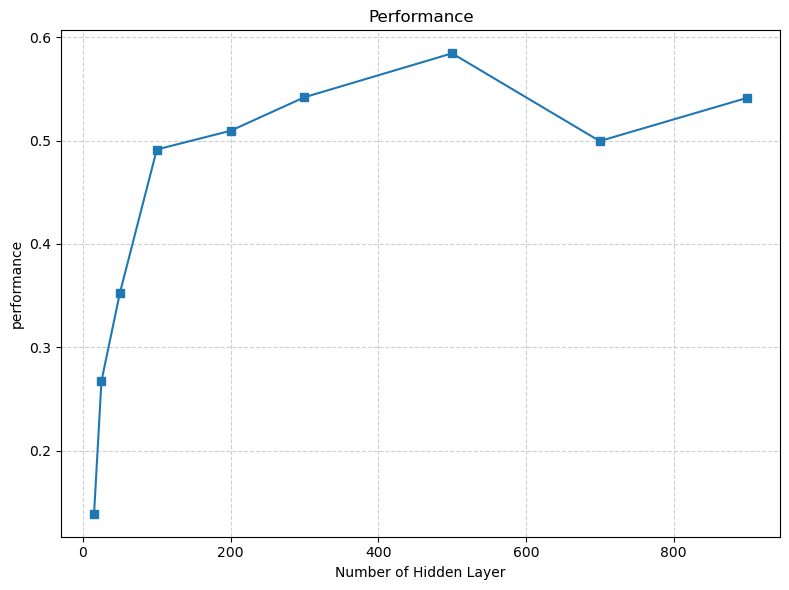

In [ ]:
import matplotlib.pyplot as plt

x_values = [15, 25, 50, 100, 200, 300, 500, 700, 900]
y_values = [f1_score00, f1_score01, f1_score02, f1_score03, f1_score04, f1_score05, f1_score06, f1_score07, f1_score08]

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='s', linestyle='-')
plt.title("Performance")
plt.xlabel("Number of Hidden Layer")
plt.ylabel("performance")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the graph
plt.tight_layout()
plt.show()

#### 2. Learning rates

In [ ]:
predictions10 = []
train_model(n10, 5)
predictions10 = make_pred(n10, predictions10)
f1_score10 = f1_score(dev_labels, predictions10, average='macro')

predictions11 = []
train_model(n11, 5)
predictions11 = make_pred(n11, predictions11)
f1_score11 = f1_score(dev_labels, predictions11, average='macro')

predictions12 = []
train_model(n12, 5)
predictions12 = make_pred(n12, predictions12)
f1_score12 = f1_score(dev_labels, predictions12, average='macro')

predictions13 = []
train_model(n13, 5)
predictions13 = make_pred(n13, predictions13)
f1_score13 = f1_score(dev_labels, predictions13, average='macro')

predictions14 = []
train_model(n14, 5)
predictions14 = make_pred(n14, predictions14)
f1_score14 = f1_score(dev_labels, predictions14, average='macro')

predictions15 = []
train_model(n15, 5)
predictions15 = make_pred(n15, predictions15)
f1_score15 = f1_score(dev_labels, predictions15, average='macro')

predictions16 = []
train_model(n16, 5)
predictions16 = make_pred(n16, predictions16)
f1_score16 = f1_score(dev_labels, predictions16, average='macro')

predictions17 = []
train_model(n17, 5)
predictions17 = make_pred(n17, predictions17)
f1_score17 = f1_score(dev_labels, predictions17, average='macro')

predictions18 = []
train_model(n18, 5)
predictions18 = make_pred(n18, predictions18)
f1_score18 = f1_score(dev_labels, predictions18, average='macro')

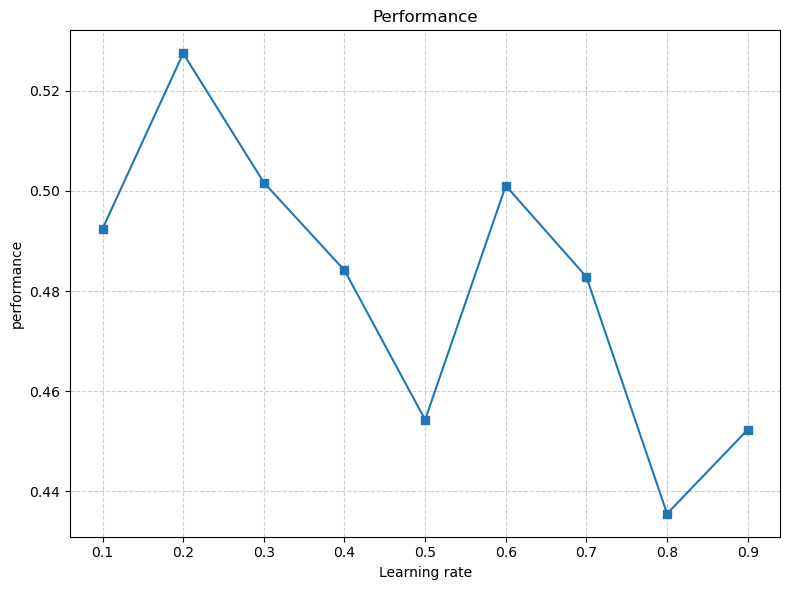

In [ ]:
import matplotlib.pyplot as plt

x_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y_values = [f1_score10, f1_score11, f1_score12, f1_score13, f1_score14, f1_score15, f1_score16, f1_score17, f1_score18]

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='s', linestyle='-')
plt.title("Performance")
plt.xlabel("Learning rate")
plt.ylabel("performance")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the graph
plt.tight_layout()
plt.show()